In [1]:
import sys
import seaborn as sns
from matplotlib.colors import ListedColormap
from datetime import datetime, timedelta
import matplotlib.dates as mdates
import matplotlib.ticker as tkr
from matplotlib import rc
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import cmocean
import os
import warnings
import pandas as pd
import h5py
from datetime import datetime
from scipy import interpolate
sys.path.append('/Users/imarkelo/git/PorousMediaLab/')
from porousmedialab.batch import Batch

sns.set_style("whitegrid")
sns.set_style("ticks")
warnings.filterwarnings('ignore')
sns.set_style("whitegrid")
sns.set_style("ticks")
rc('text', usetex=False)
rc("savefig", dpi=90)
rc("figure", dpi=90)
plt.rcParams['figure.figsize'] = 6, 4
pd.options.display.max_columns = 999
pd.options.display.max_rows = 400
str(datetime.now())
%matplotlib inline

/Users/imarkelo/anaconda3/lib/python3.6/site-packages/cmocean/tools.py:76: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not mpl.cbook.is_string_like(rgbin[0]):


In [2]:
cl_stclaitr_209 = pd.read_excel('../../measurements/St Clair Lake/Chloride_in_Lake_St_Clair.xlsx', sheet_name='st. 209')[['Collect Date','Result B']]
cl_stclaitr_209['Collect Date'] = pd.to_datetime(cl_stclaitr_209['Collect Date'])
cl_stclaitr_209['Collect Date'] = pd.to_datetime(cl_stclaitr_209['Collect Date'])
cl_stclaitr_209['Date'] = cl_stclaitr_209['Collect Date'].dt.date
cl_stclaitr_209['Year'] = cl_stclaitr_209['Collect Date'].dt.year
cl_stclaitr_209['Month'] = cl_stclaitr_209['Collect Date'].dt.month
cl_stclaitr_209['seq_m'] = (cl_stclaitr_209['Year'] - 1996)*12 + cl_stclaitr_209['Month']

cl_stclaitr_210 = pd.read_excel('../../measurements/St Clair Lake/Chloride_in_Lake_St_Clair.xlsx', sheet_name='st. 210')[['Collect Date','Result B']]
cl_stclaitr_210['Collect Date'] = pd.to_datetime(cl_stclaitr_210['Collect Date'])
cl_stclaitr_210['Collect Date'] = pd.to_datetime(cl_stclaitr_210['Collect Date'])
cl_stclaitr_210['Date'] = cl_stclaitr_210['Collect Date'].dt.date
cl_stclaitr_210['Year'] = cl_stclaitr_210['Collect Date'].dt.year
cl_stclaitr_210['Month'] = cl_stclaitr_210['Collect Date'].dt.month
cl_stclaitr_210['seq_m'] = (cl_stclaitr_210['Year'] - 1996)*12 + cl_stclaitr_210['Month']

cl_stclaitr_210 = cl_stclaitr_210.groupby('seq_m').mean().reset_index()
cl_stclaitr_209 = cl_stclaitr_209.groupby('seq_m').mean().reset_index()

cl_stclaitr = pd.merge(cl_stclaitr_210, cl_stclaitr_209, on=['seq_m', 'Year'])[['seq_m','Year','Result B_y', 'Result B_x']]

cl_stclaitr['Cl'] = (cl_stclaitr['Result B_y'] + cl_stclaitr['Result B_x'])/2

cl_stclaitr = cl_stclaitr.groupby('seq_m').mean().reset_index()

In [3]:
rivers_cl_kta = pd.read_csv('rivers_cl_kta.csv')

In [6]:
rivers_cl_kta[['St_Clair_R']].describe()

,St_Clair_R
count,216.000000
mean,1243.120923
std,138.541930
min,935.145188
25%,1159.319987
50%,1229.166544
75%,1314.000299
max,1641.712267


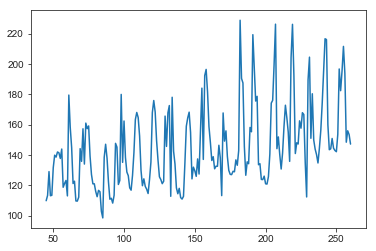

In [7]:
rivers = {'ca': {'clair': ['Thames_R', 'Sydenham_R', 'Ruscom_R'],
                 'eastern': ['Grand_R', 'Nanticoke_R', 'Lynn_R', 'Big_R'],
                 'central': ['Big_Otter_R', 'Kettle_R'],
                 'western': ['Turkey_R', 'Canard_R']},
          'us': {'clair': ['Clinton_R', 'Belle_R', 'Black_R_MI'],
                 'eastern': ['Cattaraugus_R', 'Buffalo_R'],
                 'central': ['Sandusky_R', 'Black_OH_R', 'Vermilion_R', 'Rocky_R', 'Cuyahoga_R',
                             'Chagrin_R', 'Grand_OH_R', 'Conneaut_R'],
                 'western': ['Rouge_R', 'Huron_MI_R', 'Raisin_R', 'Maumee_R', 'Portage_R']},
          'StClair': ['St_Clair_R']}
Lsc = 1/12*rivers_cl_kta[
    ['Thames_R', 'Sydenham_R', 'Ruscom_R']+
    ['Clinton_R', 'Black_R_MI']].dropna().sum(axis=1)/0.5 + \
    1/12*rivers_cl_kta[['St_Clair_R']].dropna().sum(axis=1)
Lsc.plot()

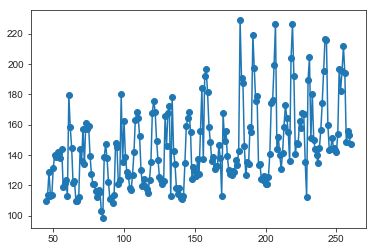

In [8]:
LTsc = Lsc.index.values
Lsc_spl = sp.interpolate.InterpolatedUnivariateSpline(LTsc, Lsc, ext=3)
plt.scatter(LTsc, Lsc)
plt.plot(LTsc, Lsc_spl(LTsc))

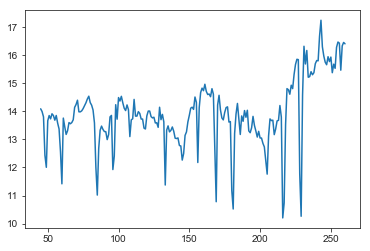

In [9]:
discharge_ckmy = pd.read_csv('discharge_ckmy.csv')
Wsc = 1/12*discharge_ckmy[rivers['us']['clair']+rivers['ca']['clair']].dropna().sum(axis=1)/0.75 + \
    1/12*discharge_ckmy[rivers['StClair']].dropna().sum(axis=1)
WTsc = Wsc.index.values
plt.plot(WTsc, Wsc)

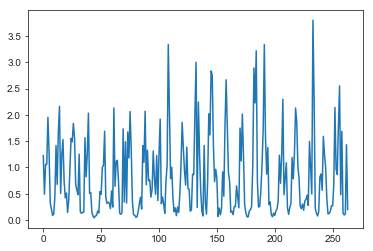

In [10]:
Wwb = 1/12*discharge_ckmy[rivers['us']['western']+rivers['ca']['western']].sum(axis=1)/0.75
WTwb = Wwb.index.values
plt.plot(WTwb, Wwb)

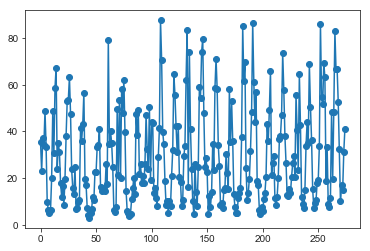

In [11]:
Lwb = 1/12*rivers_cl_kta[rivers['us']['western']+rivers['ca']['western']].sum(axis=1)/0.75
LTwb = Lwb.index.values
Lwb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)
plt.scatter(LTwb, Lwb)
plt.plot(LTwb, Lwb_spl(LTwb))

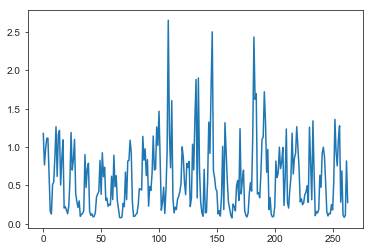

In [12]:
Wcb = 1/12*discharge_ckmy[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
WTcb = Wcb.index.values
plt.plot(WTcb, Wcb)

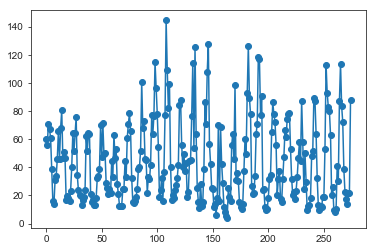

In [13]:
Lcb = 1/12*rivers_cl_kta[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
LTcb = Lcb.index.values
Lcb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)
plt.scatter(LTcb, Lcb)
plt.plot(LTcb, Lcb_spl(LTcb))

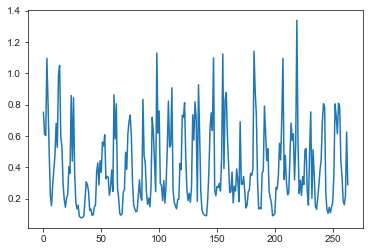

In [14]:
Web = 1/12*discharge_ckmy[rivers['us']['eastern']+rivers['ca']['eastern']].sum(axis=1)/0.75
WTeb = Web.index.values
plt.plot(WTeb, Web)

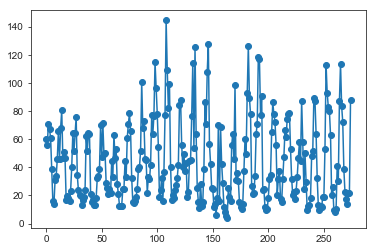

In [15]:
Leb = 1/12*rivers_cl_kta[rivers['us']['central']+rivers['ca']['central']].sum(axis=1)/0.75
LTeb = Leb.index.values
Leb_spl = sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)
plt.scatter(LTeb, Leb)
plt.plot(LTeb, Leb_spl(LTeb))

## Residence time

In [16]:
# bl.constants['Vsc']/(5265+29)/1e6*3600*24*365*365
# bl.constants['Vwb']/(5594+85)/1e6*3600*24*365*365
# bl.constants['Vcb']/(5594+856)/1e6*3600*24*365
bl.constants['Veb']/(6203+188)/1e6*3600*24*365


NameError: name 'bl' is not defined

In [17]:
Area = 26858*1e6 #m2
Area_ecl_stClair = 25744*1e6 #m2
conversion_fac_mmy_to_cms = Area_ecl_stClair/1000/365/24/3600
conversion_fac_mmy_to_cms_incl_clair = Area/1000/365/24/3600
conversion_fac_mmy_to_cms_st_clair = (Area - Area_ecl_stClair)/1000/365/24/3600
conversion_fac_mmy_to_cms_eastern = 6.91e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_western = 2.842e+9/1000/365/24/3600
conversion_fac_mmy_to_cms_central = (Area_ecl_stClair - 6.91e+9 - 2.842e+9)/1000/365/24/3600

st_clair_area_ratio = conversion_fac_mmy_to_cms_st_clair/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
western_area_ratio = conversion_fac_mmy_to_cms_western/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
central_area_ratio = conversion_fac_mmy_to_cms_central/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)
eastern_area_ratio = conversion_fac_mmy_to_cms_eastern/(conversion_fac_mmy_to_cms_st_clair+conversion_fac_mmy_to_cms_eastern+conversion_fac_mmy_to_cms_western+conversion_fac_mmy_to_cms_central)

In [18]:
shift = 0

tend = 22*12 - shift
dt = 0.1
bl = Batch(tend, dt)
bl.add_species(name='Csc', init_conc=8.35)
bl.add_species(name='Cwb', init_conc=13)
bl.add_species(name='Ccb', init_conc=14)
bl.add_species(name='Ceb', init_conc=16)
bl.constants['Vsc'] = 4.17
bl.constants['Vwb'] = 25
bl.constants['Vcb'] = 305
bl.constants['Veb'] = 154

bl.constants['Dwc'] = 0
bl.constants['Dce'] = 1./12*200


bl.functions['LTsc'] = np.array2string(Lsc.index.values-shift, separator=',')
bl.functions['Lsc'] = np.array2string(Lsc.values, separator=',')
bl.functions['WTsc'] = np.array2string(Wsc.index.values-shift, separator=',')
bl.functions['Wsc'] = np.array2string(Wsc.values, separator=',')
bl.functions['LTwb'] = np.array2string(Lwb.index.values-shift, separator=',')
bl.functions['Lwb'] = np.array2string(Lwb.values, separator=',')
bl.functions['WTwb'] = np.array2string(Wwb.index.values-shift, separator=',')
bl.functions['Wwb'] = np.array2string(Wwb.values, separator=',')
bl.functions['LTcb'] = np.array2string(Lcb.index.values-shift, separator=',')
bl.functions['Lcb'] = np.array2string(Lcb.values, separator=',')
bl.functions['WTcb'] = np.array2string(Wcb.index.values-shift, separator=',')
bl.functions['Wcb'] = np.array2string(Wcb.values, separator=',')
bl.functions['LTeb'] = np.array2string(Leb.index.values-shift, separator=',')
bl.functions['Leb'] = np.array2string(Leb.values, separator=',')
bl.functions['WTeb'] = np.array2string(Web.index.values-shift, separator=',')
bl.functions['Web'] = np.array2string(Web.values, separator=',')
bl.functions['Wsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTsc, Wsc,ext=3)'
bl.functions['Lsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTsc, Lsc, ext=3)'
bl.functions['Wwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTwb, Wwb,ext=3)'
bl.functions['Lwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)'
bl.functions['Wcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTcb, Wcb,ext=3)'
bl.functions['Lcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)'
bl.functions['Web_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTeb, Web,ext=3)'
bl.functions['Leb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)'

bl.dcdt['Csc'] = 'Lsc_spl(TIME+1/12*120)/Vsc  - Wsc_spl(TIME)*Csc/Vsc'
bl.dcdt['Cwb'] = '(Lwb_spl(TIME)+1/12*120)/Vwb  + Wsc_spl(TIME)*Csc/Vwb - (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vwb - Dwc/Vwb*(Cwb - Ccb)'
bl.dcdt['Ccb'] = '(Lcb_spl(TIME)+1/12*100)/Vcb  + (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vcb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Vcb- Dwc/Vcb*(Ccb - Cwb) - Dce/Vcb*(Ccb - Ceb)'
bl.dcdt['Ceb'] = '(Leb_spl(TIME)+1/12*100)/Veb  + (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Veb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME)+Web_spl(TIME))*Ceb/Veb - Dce/Veb*(Ceb - Ccb)'
bl.solve()
bl.solve()

Simulation started:
	 2019-04-05 16:25:55


Estimated time of the code execution:
	 0h:00m:17s
Will finish approx.:
	 2019-04-05 16:26:13
Simulation started:
	 2019-04-05 16:26:13


Estimated time of the code execution:
	 0h:00m:17s
Will finish approx.:
	 2019-04-05 16:26:31


In [19]:
shift = 0

tend = 22*12 - shift
dt = 0.1
bl_noex = Batch(tend, dt)
bl_noex.add_species(name='Csc', init_conc=8.35)
bl_noex.add_species(name='Cwb', init_conc=13)
bl_noex.add_species(name='Ccb', init_conc=14)
bl_noex.add_species(name='Ceb', init_conc=16)
bl_noex.constants['Vsc'] = 4.17
bl_noex.constants['Vwb'] = 25
bl_noex.constants['Vcb'] = 305
bl_noex.constants['Veb'] = 154

bl_noex.constants['Dwc'] = 0.
bl_noex.constants['Dce'] = 0.


bl_noex.functions['LTsc'] = np.array2string(Lsc.index.values-shift, separator=',')
bl_noex.functions['Lsc'] = np.array2string(Lsc.values, separator=',')
bl_noex.functions['WTsc'] = np.array2string(Wsc.index.values-shift, separator=',')
bl_noex.functions['Wsc'] = np.array2string(Wsc.values, separator=',')
bl_noex.functions['LTwb'] = np.array2string(Lwb.index.values-shift, separator=',')
bl_noex.functions['Lwb'] = np.array2string(Lwb.values, separator=',')
bl_noex.functions['WTwb'] = np.array2string(Wwb.index.values-shift, separator=',')
bl_noex.functions['Wwb'] = np.array2string(Wwb.values, separator=',')
bl_noex.functions['LTcb'] = np.array2string(Lcb.index.values-shift, separator=',')
bl_noex.functions['Lcb'] = np.array2string(Lcb.values, separator=',')
bl_noex.functions['WTcb'] = np.array2string(Wcb.index.values-shift, separator=',')
bl_noex.functions['Wcb'] = np.array2string(Wcb.values, separator=',')
bl_noex.functions['LTeb'] = np.array2string(Leb.index.values-shift, separator=',')
bl_noex.functions['Leb'] = np.array2string(Leb.values, separator=',')
bl_noex.functions['WTeb'] = np.array2string(Web.index.values-shift, separator=',')
bl_noex.functions['Web'] = np.array2string(Web.values, separator=',')
bl_noex.functions['Wsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTsc, Wsc,ext=3)'
bl_noex.functions['Lsc_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTsc, Lsc, ext=3)'
bl_noex.functions['Wwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTwb, Wwb,ext=3)'
bl_noex.functions['Lwb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTwb, Lwb, ext=3)'
bl_noex.functions['Wcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTcb, Wcb,ext=3)'
bl_noex.functions['Lcb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTcb, Lcb, ext=3)'
bl_noex.functions['Web_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(WTeb, Web,ext=3)'
bl_noex.functions['Leb_spl'] = 'sp.interpolate.InterpolatedUnivariateSpline(LTeb, Leb, ext=3)'

bl_noex.dcdt['Csc'] = 'Lsc_spl(TIME+1/12*120)/Vsc  - Wsc_spl(TIME)*Csc/Vsc'
bl_noex.dcdt['Cwb'] = '(Lwb_spl(TIME)+1/12*120)/Vwb  + Wsc_spl(TIME)*Csc/Vwb - (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vwb - Dwc/Vwb*(Cwb - Ccb)'
bl_noex.dcdt['Ccb'] = '(Lcb_spl(TIME)+1/12*100)/Vcb  + (Wsc_spl(TIME)+Wwb_spl(TIME))*Cwb/Vcb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Vcb- Dwc/Vcb*(Ccb - Cwb) - Dce/Vcb*(Ccb - Ceb)'
bl_noex.dcdt['Ceb'] = '(Leb_spl(TIME)+1/12*100)/Veb  + (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME))*Ccb/Veb - (Wsc_spl(TIME)+Wwb_spl(TIME)+Wcb_spl(TIME)+Web_spl(TIME))*Ceb/Veb - Dce/Veb*(Ceb - Ccb)'
bl_noex.solve()

Simulation started:
	 2019-04-05 16:26:30


Estimated time of the code execution:
	 0h:00m:17s
Will finish approx.:
	 2019-04-05 16:26:49


In [20]:
bl.dynamic_functions['dydt_str']
1

1

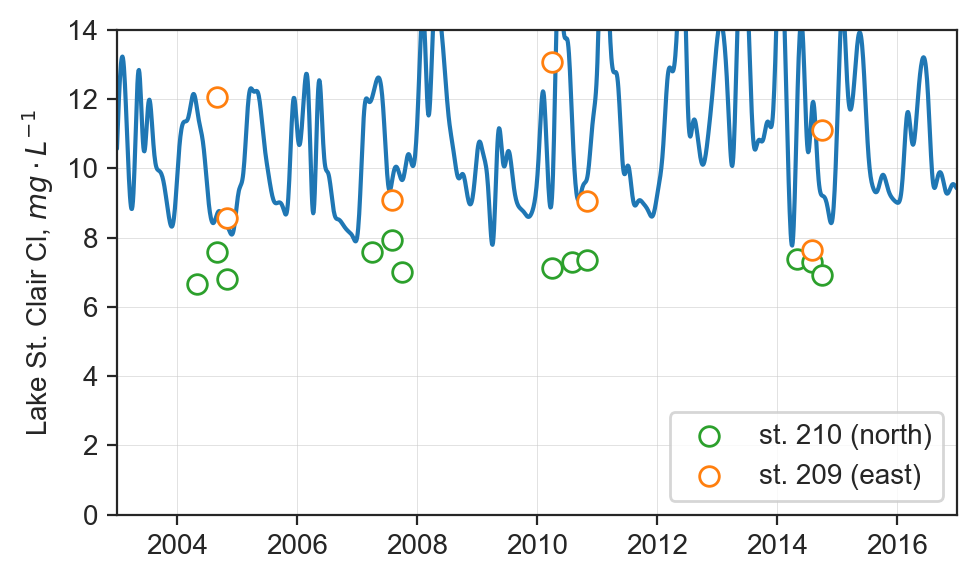

In [21]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)


axes.plot((bl.time + shift)/12 + 1996, bl.species['Csc']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values-1)/12 + 1996, cl_stclaitr['Cl'].values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)
axes.scatter((cl_stclaitr_210['seq_m'].values-1)/12 + 1996, cl_stclaitr_210['Result B'].values, edgecolors=sns.color_palette()[2], s=50, marker='o', facecolors='white', zorder=10, label='st. 210 (north)')
axes.scatter((cl_stclaitr_209['seq_m'].values-1)/12 + 1996, cl_stclaitr_209['Result B'].values, edgecolors=sns.color_palette()[1], s=50, marker='o', facecolors='white', zorder=10, label='st. 209 (east)')

axes.set_ylim(0,14)
axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
axes.legend(loc=4)
axes.set_ylabel('Lake St. Clair Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_stclair.pdf')






### Area weighted averages or depth integrated values:

In [22]:
EB_A = pd.read_csv('Eastern_basin_averages_mgL.csv')
CB_A = pd.read_csv('Central_basin_averages_mgL.csv')
WB_A = pd.read_csv('Western_basin_averages_mgL.csv')
WB_AWA = pd.read_csv('Western_basin_area_weighted_averages_mgL.csv')
CB_AWA = pd.read_csv('Central_basin_area_weighted_averages_mgL.csv')
EB_AWA = pd.read_csv('Eastern_basin_area_weighted_averages_mgL.csv')

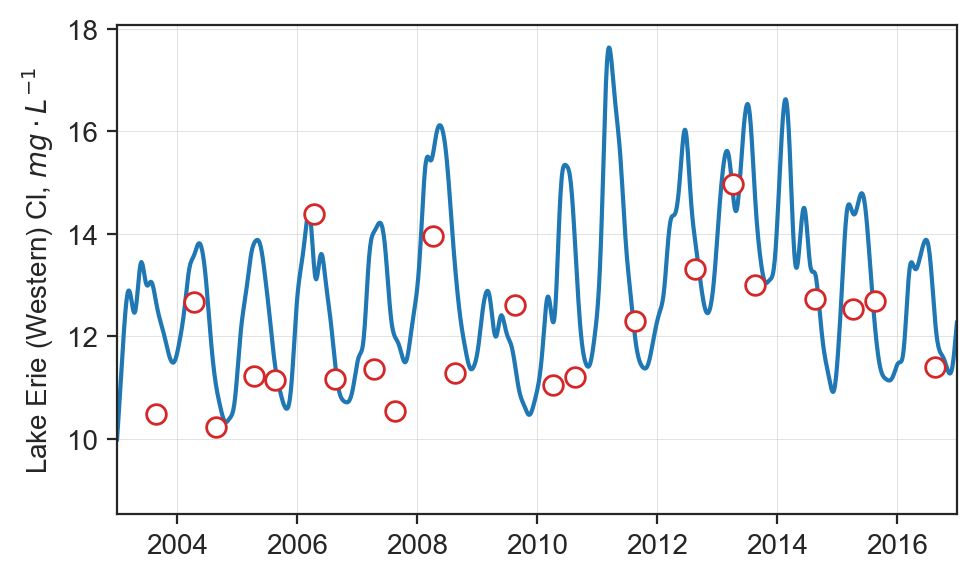

In [23]:


f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

WB_AWA = WB_AWA[WB_AWA.Value<15]

axes.plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)
axes.scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)
# axes.scatter(WB_A.Year + (WB_A.Month-1)/11, WB_A['mean'].values, c=sns.color_palette()[3], s=50, marker='x', zorder=10)

# axes.set_ylim(0,16)
axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
axes.set_ylabel('Lake Erie (Western) Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_western.pdf')






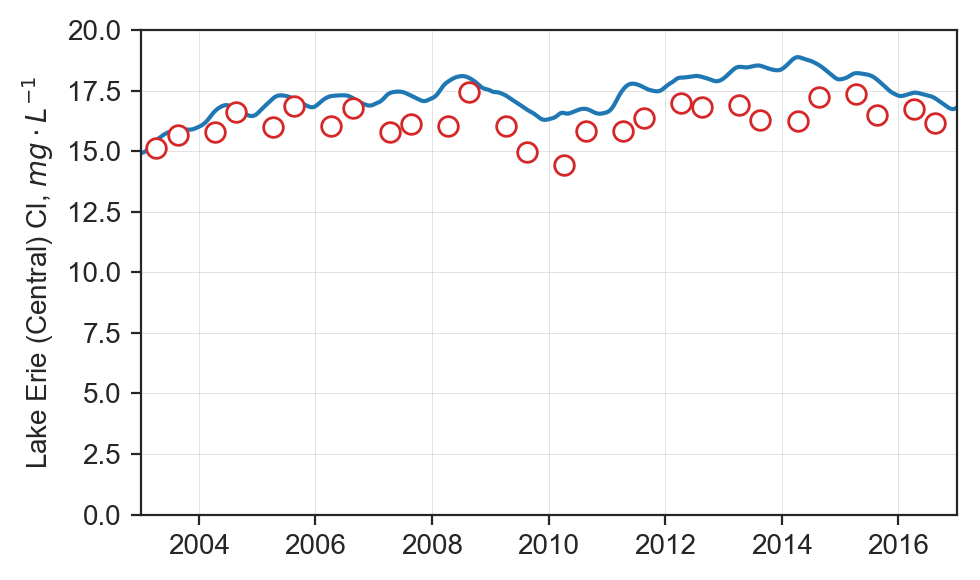

In [24]:


f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)


axes.plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)
axes.scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)
# axes.scatter(CB_A.Year + (CB_A.Month-1)/11, CB_A['mean'].values, c=sns.color_palette()[3], s=50, marker='x', zorder=10)

axes.set_ylim(0,20)
axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
axes.set_ylabel('Lake Erie (Central) Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_central.pdf')






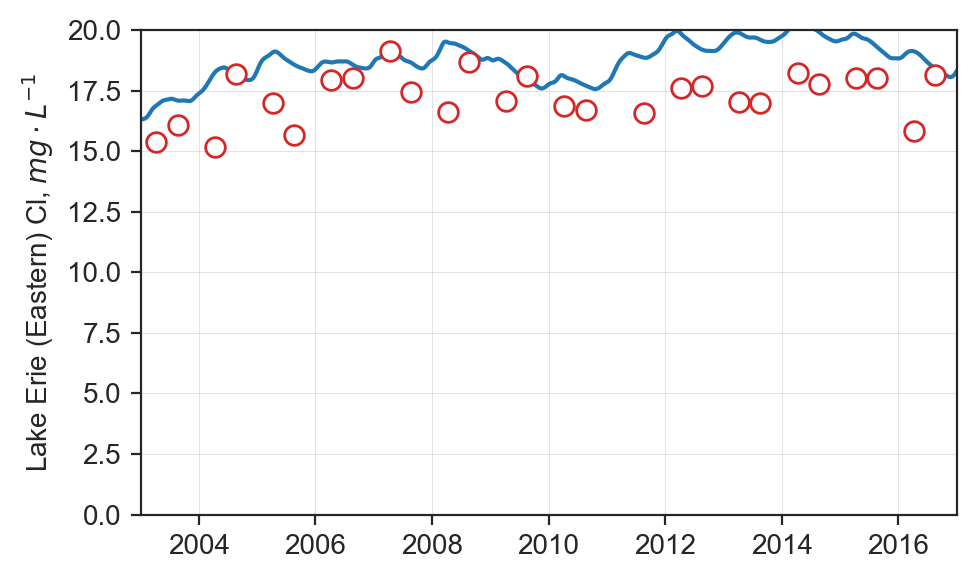

In [25]:


f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)

EB_AWA = EB_AWA[EB_AWA.Value>8]

axes.plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten())
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)
axes.scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)
# axes.scatter(EB_A.Year + (EB_A.Month-1)/11, EB_A['mean'].values, c=sns.color_palette()[3], s=50, marker='x', zorder=10)
# axes.scatter(EB_A.Year + (EB_A.Month-1)/11, EB_A['mean'].values, c=sns.color_palette()[3], s=50, marker='x', zorder=10)

axes.set_ylim(0,20)
axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
axes.set_ylabel('Lake Erie (Eastern) Cl, $mg\cdot L^{-1}$')


# handles, labels = axes.get_legend_handles_labels()
# f.legend( handles, labels, loc = (0.3, 0.83), ncol=2, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_eastern.pdf')






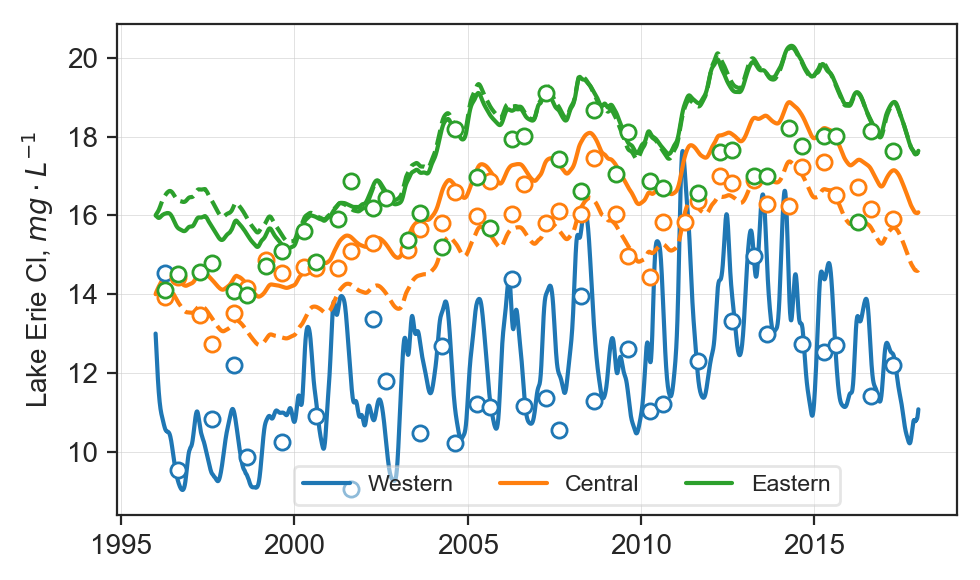

In [26]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)


axes.plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0])
axes.plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), label='Central', c=sns.color_palette()[1])
axes.plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), label='Eastern', c=sns.color_palette()[2])
axes.plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[1])
axes.plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ceb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[2])
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)

axes.scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors=sns.color_palette()[0], s=30, marker='o', facecolors='white', zorder=10)
axes.scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors=sns.color_palette()[1], s=30, marker='o', facecolors='white', zorder=10)
axes.scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors=sns.color_palette()[2], s=30, marker='o', facecolors='white', zorder=10)


# axes.set_ylim(0,None)
# axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
axes.set_ylabel('Lake Erie Cl, $mg\cdot L^{-1}$')


handles, labels = axes.get_legend_handles_labels()
f.legend( handles, labels, loc = (0.3, 0.13), ncol=3, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_lake_erie.pdf')






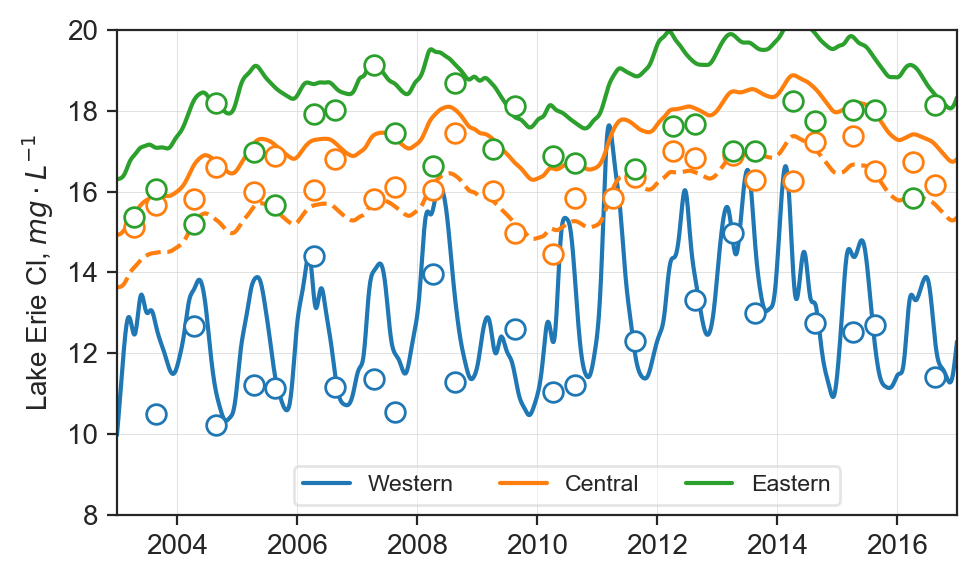

In [27]:
f, axes = plt.subplots(1,1, figsize=(5,3), dpi=200, sharex=True)


axes.plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0])
axes.plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), label='Central', c=sns.color_palette()[1])
axes.plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), label='Eastern', c=sns.color_palette()[2])
axes.plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[1])
# axes.plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ceb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[2])
# axes.scatter((cl_stclaitr['seq_m'].values+ shift)/12 + 1996, cl_stclaitr['Cl'].values, c=sns.color_palette()[1], s=10)

axes.scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors=sns.color_palette()[0], s=50, marker='o', facecolors='white', zorder=10)
axes.scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors=sns.color_palette()[1], s=50, marker='o', facecolors='white', zorder=10)
axes.scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors=sns.color_palette()[2], s=50, marker='o', facecolors='white', zorder=10)


axes.set_ylim(8,20)
axes.set_xlim(2003,2017)
# axes.set_xlim(datetime(2002,12,31),datetime(2018,1,1))
# axes.legend(loc=2)
axes.set_ylabel('Lake Erie Cl, $mg\cdot L^{-1}$')


handles, labels = axes.get_legend_handles_labels()
f.legend( handles, labels, loc = (0.3, 0.13), ncol=3, frameon=1, framealpha=0.5, fontsize='small' )
# handles_2, labels_2 = ax2.get_legend_handles_labels()
# f.legend( handles + handles_2, labels+labels_2, loc = (0.18, 0.87), ncol=3, frameon=1, framealpha=0.5, fontsize='x-small' )
plt.tight_layout(h_pad=0.1)
axes.set_xlabel('')
axes.grid(lw=0.2)
plt.tight_layout()
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_lake_erie.pdf')






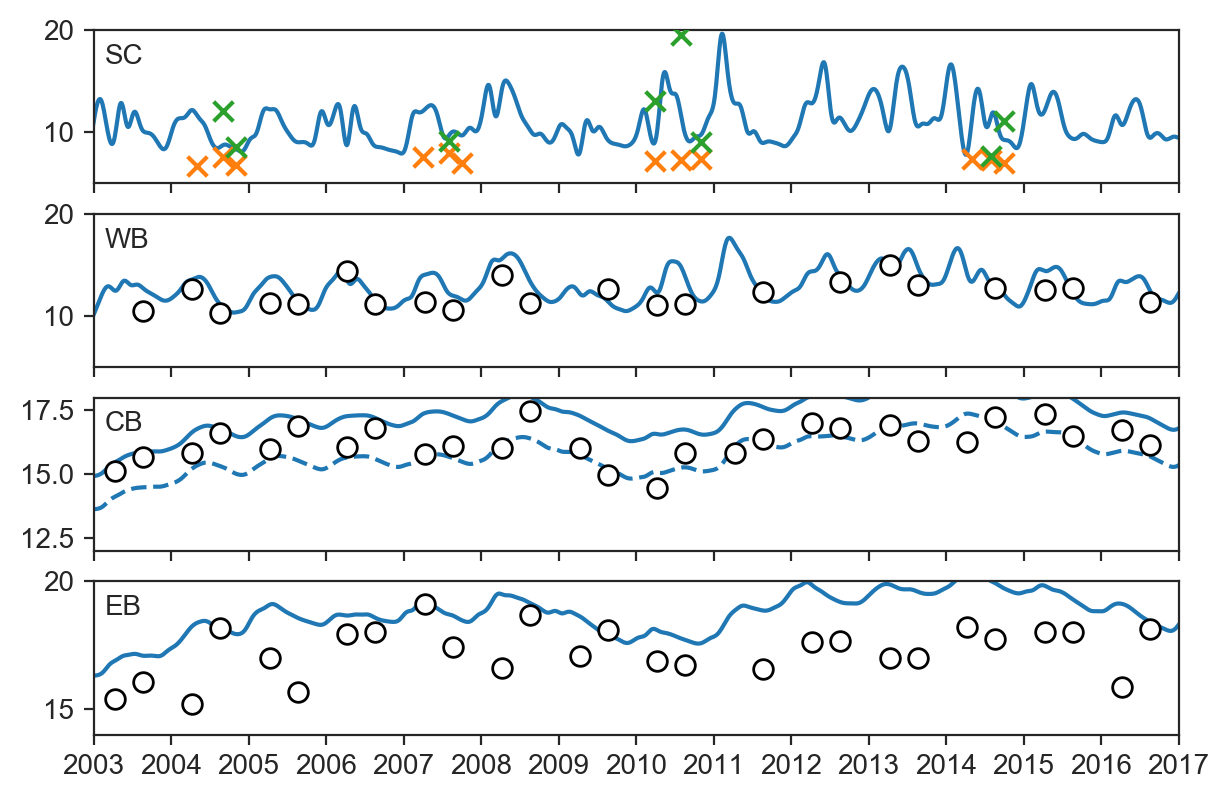

In [28]:
f, axes = plt.subplots(4,1, figsize=(17.5/2.5,17.5/1.5/2.5), dpi=200, sharex=True, sharey=False)


axes[0].plot((bl.time + shift)/12 + 1996, bl.species['Csc']['concentration'].flatten(), c=sns.color_palette()[0])
# axes.scatter((cl_stclaitr['seq_m'].values-1)/12 + 1996, cl_stclaitr['Cl'].values, edgecolors=sns.color_palette()[3], s=50, marker='o', facecolors='white', zorder=10)



axes[1].plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0])
axes[2].plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), label='Central', c=sns.color_palette()[0])
axes[2].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0])

axes[3].plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), label='Eastern', c=sns.color_palette()[0])


axes[0].scatter((cl_stclaitr_210['seq_m'].values-1)/12 + 1996, cl_stclaitr_210['Result B'].values, edgecolors=sns.color_palette()[1], s=50, marker='x', facecolors=sns.color_palette()[1], zorder=10, label='st. 210 (north)')
axes[0].scatter((cl_stclaitr_209['seq_m'].values-1)/12 + 1996, cl_stclaitr_209['Result B'].values, edgecolors=sns.color_palette()[2], s=50, marker='x', facecolors=sns.color_palette()[2], zorder=10, label='st. 209 (east)')
axes[1].scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[2].scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[3].scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)




props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='k')
axes[0].text(0.01, 0.91, 'SC', transform=axes[0].transAxes,
        verticalalignment='top', bbox=props)
axes[1].text(0.01, 0.91, 'WB', transform=axes[1].transAxes,
        verticalalignment='top', bbox=props)
axes[2].text(0.01, 0.91, 'CB', transform=axes[2].transAxes,
        verticalalignment='top', bbox=props)
axes[3].text(0.01, 0.91, 'EB', transform=axes[3].transAxes,
        verticalalignment='top', bbox=props)



axes[0].set_xlim(2003,2017)
axes[0].set_ylim(5,20)
axes[1].set_ylim(5,20)
axes[2].set_ylim(12,18)
axes[3].set_ylim(14,20)


# axes[2].set_yticks([15,18])
axes[3].set_xticks(np.arange(2003,2018))
# axes[0].set_ylim(0,20)


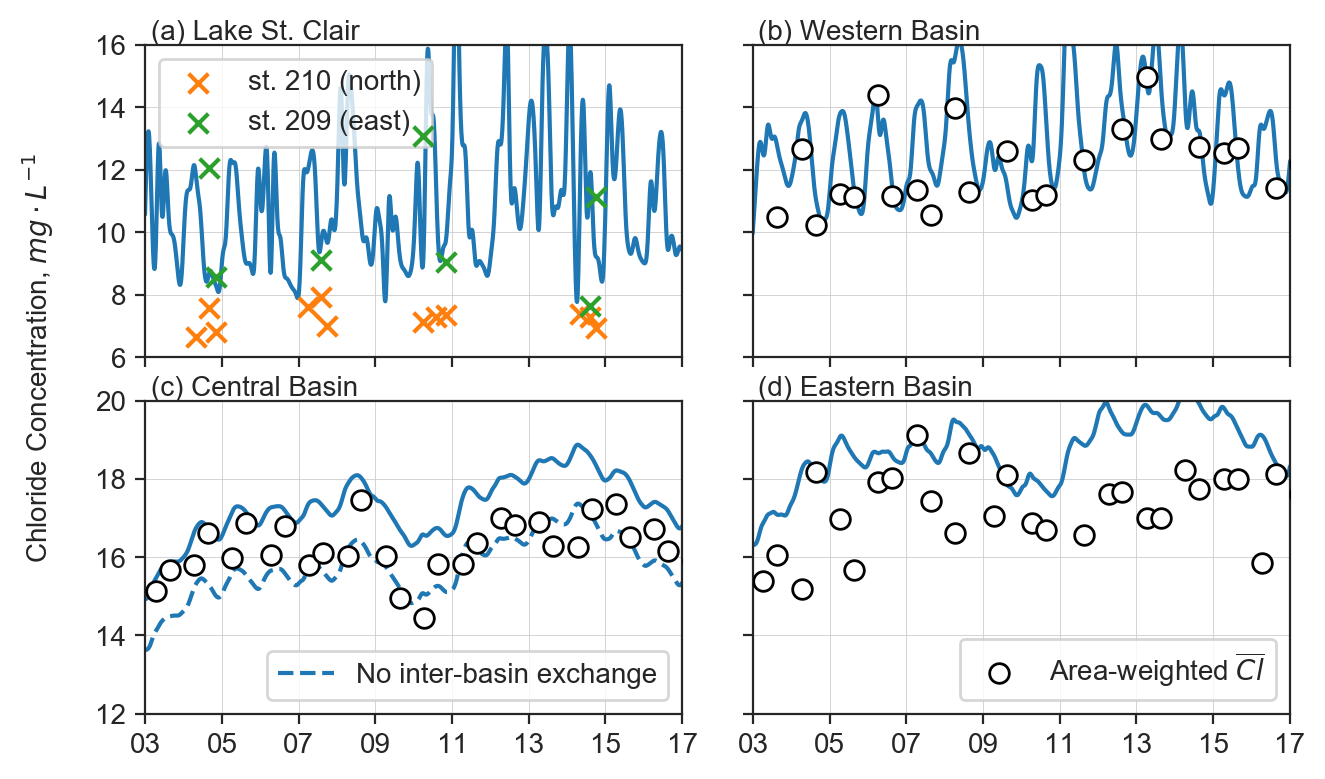

In [29]:
f, axes = plt.subplots(2,2, figsize=(17.5/2.5,17.5/1.8/2.5), dpi=200, sharex=True, sharey=False)


axes[0][0].plot((bl.time + shift)/12 + 1996, bl.species['Csc']['concentration'].flatten(), c=sns.color_palette()[0])



axes[0][1].plot((bl.time + shift)/12 + 1996, bl.species['Cwb']['concentration'].flatten(), label='Western', c=sns.color_palette()[0])

axes[1][0].plot((bl_noex.time + shift)/12 + 1996, bl_noex.species['Ccb']['concentration'].flatten(),  ls='--', c=sns.color_palette()[0], label='No inter-basin exchange')
axes[1][0].plot((bl.time + shift)/12 + 1996, bl.species['Ccb']['concentration'].flatten(), c=sns.color_palette()[0])

axes[1][1].plot((bl.time + shift)/12 + 1996, bl.species['Ceb']['concentration'].flatten(), c=sns.color_palette()[0])


axes[0][0].scatter((cl_stclaitr_210['seq_m'].values-1)/12 + 1996, cl_stclaitr_210['Result B'].values, edgecolors=sns.color_palette()[1], s=50, marker='x', facecolors=sns.color_palette()[1], zorder=10, label='st. 210 (north)')
axes[0][0].scatter((cl_stclaitr_209['seq_m'].values-1)/12 + 1996, cl_stclaitr_209['Result B'].values, edgecolors=sns.color_palette()[2], s=50, marker='x', facecolors=sns.color_palette()[2], zorder=10, label='st. 209 (east)')
axes[0][1].scatter(WB_AWA.Year + (WB_AWA.Month-1)/11, WB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[1][0].scatter(CB_AWA.Year + (CB_AWA.Month-1)/11, CB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10)
axes[1][1].scatter(EB_AWA.Year + (EB_AWA.Month-1)/11, EB_AWA.Value.values, edgecolors='k', s=50, marker='o', facecolors='white', zorder=10, label='Area-weighted $\overline{Cl}$')




props = dict(boxstyle='square', facecolor='white', alpha=0., edgecolor='k')
axes[0][0].text(0.01, 1.08, '(a) Lake St. Clair', transform=axes[0][0].transAxes,
        verticalalignment='top', bbox=props)
axes[0][1].text(0.01, 1.08, '(b) Western Basin', transform=axes[0][1].transAxes,
        verticalalignment='top', bbox=props)
axes[1][0].text(0.01, 1.08, '(c) Central Basin', transform=axes[1][0].transAxes,
        verticalalignment='top', bbox=props)
axes[1][1].text(0.01, 1.08, '(d) Eastern Basin', transform=axes[1][1].transAxes,
        verticalalignment='top', bbox=props)


axes[0][0].text(-0.2, -0., 'Chloride Concentration, $mg\cdot L^{-1}$', transform=axes[0][0].transAxes, horizontalalignment='center',
        verticalalignment='center', bbox=props, rotation=90)

axes[1][0].set_xticks([2003,2005,2007, 2009, 2011, 2013, 2015, 2017])
axes[1][0].set_xticklabels(['03','05','07', '09', '11', '13', '15', '17'])

axes[0][0].set_xlim(2003,2017)
axes[0][0].set_ylim(6,16)
axes[0][1].set_ylim(6,16)
axes[1][0].set_ylim(12,20)
axes[1][1].set_ylim(12,20)


axes[0][0].legend(loc=2)
axes[1][1].legend(loc=4)
axes[1][0].legend(loc=4)


plt.tight_layout(w_pad=0.01)

for ax in axes:
    ax[1].set_yticklabels([])
    for a in ax:
        a.grid(lw=0.3)
plt.subplots_adjust(left=0.15)        
# f.savefig('/Users/imarkelo/Google Drive/GDocuments/Lake Erie/Draft/Chloride budget/latex/img/cl_modeled_vs_measured.pdf')
